# Mobile Price Range Prediction

### Abstract:
  There is a new mobile company and the CEO wants to give a tough fight to big companies like Apple, Samsung etc. He has no idea of how to estimate the price of mobiles his company creates. A simple assumption of the prices will not be profitable in this competitive world. To solve this problem he collects sales data of mobile phones of various companies. Thus, the CEO has hired you to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory etc) and its selling price
### Problem Statement:
Predict a price range, indicating how high the price is, using the Naive Bayes algorithm.


## Data Definition:
### Input variables:

<b>Independent Variable</b>

battery_power: Total energy a battery can store in one time measured in mAh

blue: Has bluetooth or not

clock_speed: speed at which microprocessor executes instructions

dual_sim: Has dual sim support or not

fc: Front Camera mega pixels

four_g: Has 4G or not

int_memory: Internal Memory in Gigabytes

m_dep: Mobile Depth in cm

mobile_wt: Weight of mobile phone

n_cores: Number of cores of processor

pc: Primary Camera mega pixels

px_height: Pixel Resolution Height

px_width: Pixel Resolution Width

ram: Random Access Memory in Mega Bytes

sc_h: Screen Height of mobile in cm

sc_w: Screen Width of mobile in cm

talk_time: longest time that a single battery charge will last when you are

three_g: Has 3G or not

touch_screen: Has touch screen or not

wifi: Has wifi or not

<b>Dependent Variable</b>

price_range: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

### Read the Dataset

In [2]:
df = pd.read_csv('mobile_price.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### Data Analysis and Preparation
	
Data preparation is the process of cleaning and transforming raw data before building predictive models.

Here, we analyze and perform the following tasks:
1. Check data types. Ensure your data types are correct.
2. We need to change the data types as per requirement If they are not as per business definition
3. Go through the summary statistics
4. Distribution of variables
5. Study the correlation
6. Detect outliers from the data
7. Look for the missing values

### Understanding the dataset

In [4]:
df1=df.copy()
df1.shape

(2000, 21)

In [5]:
df1.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

### Checking Data Types

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
df1.dtypes.value_counts()

int64      19
float64     2
dtype: int64

<b>1. For getting the statistical summary of numerical variables we use the describe()

In [8]:
df1.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


- The above output displays the summary statistics of all the numeric variables like mean, median, standard deviation, minimum, and the maximum values, the first and third quantiles.

- We can see that the battery_power ranges from 501 to 1998, with mean 1238.5185

### Checking for null values and duplicates

In [9]:
df1.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [10]:
df1.duplicated().sum()

0

### Univariate Data Analysis

In [11]:
for column in df1.columns:
     print("\n" + column)
     print(df1[column].value_counts())


battery_power
1872    6
618     6
1589    6
1715    5
1807    5
       ..
660     1
1452    1
1005    1
1372    1
858     1
Name: battery_power, Length: 1094, dtype: int64

blue
0    1010
1     990
Name: blue, dtype: int64

clock_speed
0.5    413
2.8     85
2.3     78
2.1     76
1.6     76
2.5     74
0.6     74
1.4     70
1.3     68
1.5     67
2.0     67
1.9     65
0.7     64
2.9     62
1.8     62
1.0     61
1.7     60
2.2     59
0.9     58
2.4     58
0.8     58
1.2     56
2.6     55
2.7     55
1.1     51
3.0     28
Name: clock_speed, dtype: int64

dual_sim
1    1019
0     981
Name: dual_sim, dtype: int64

fc
0     474
1     245
2     189
3     170
5     139
4     133
6     112
7     100
9      78
8      77
10     62
11     51
12     45
13     40
16     24
15     23
14     20
18     11
17      6
19      1
Name: fc, dtype: int64

four_g
1    1043
0     957
Name: four_g, dtype: int64

int_memory
27    47
16    45
14    45
57    42
2     42
      ..
22    24
38    23
62    21
4     20
59

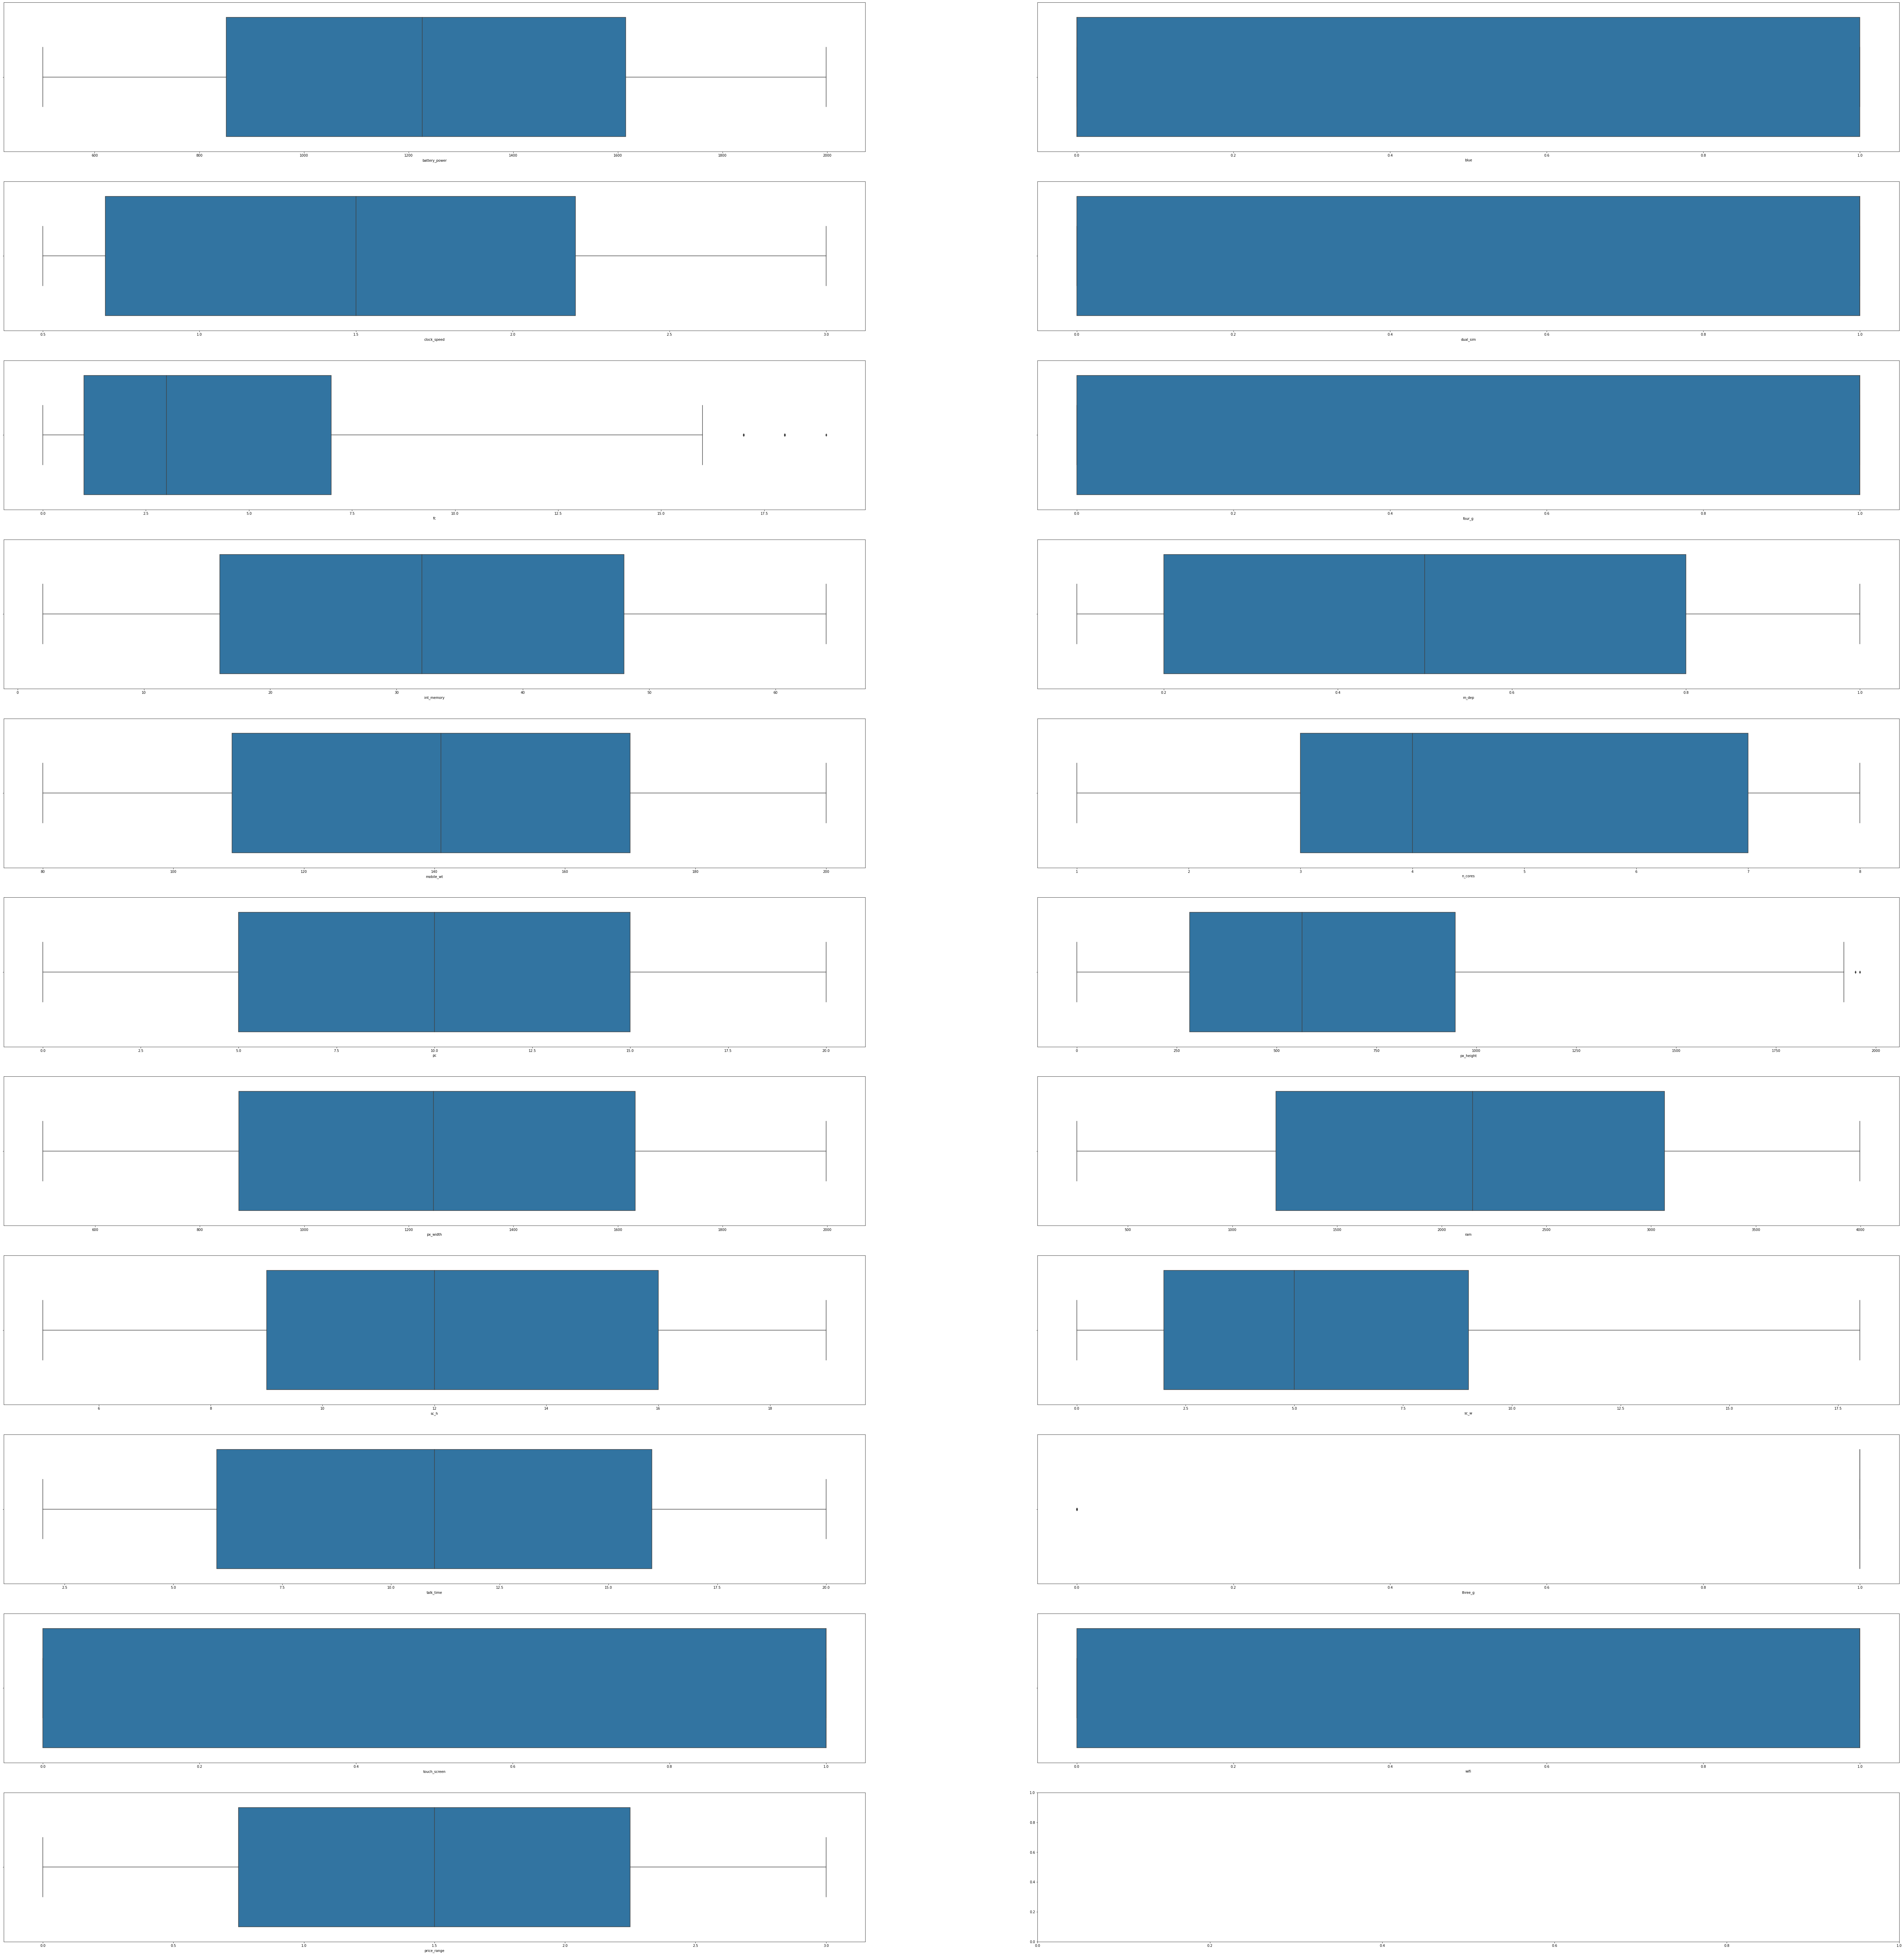

In [15]:
fig, ax = plt.subplots(nrows=11, ncols=2, figsize = (100, 105))

# plot the count plot using boxplot() for each numerical variable
for variable, subplot in zip(df1, ax.flatten()):
    sns.boxplot(df1[variable], ax = subplot)

- There are some outliers present

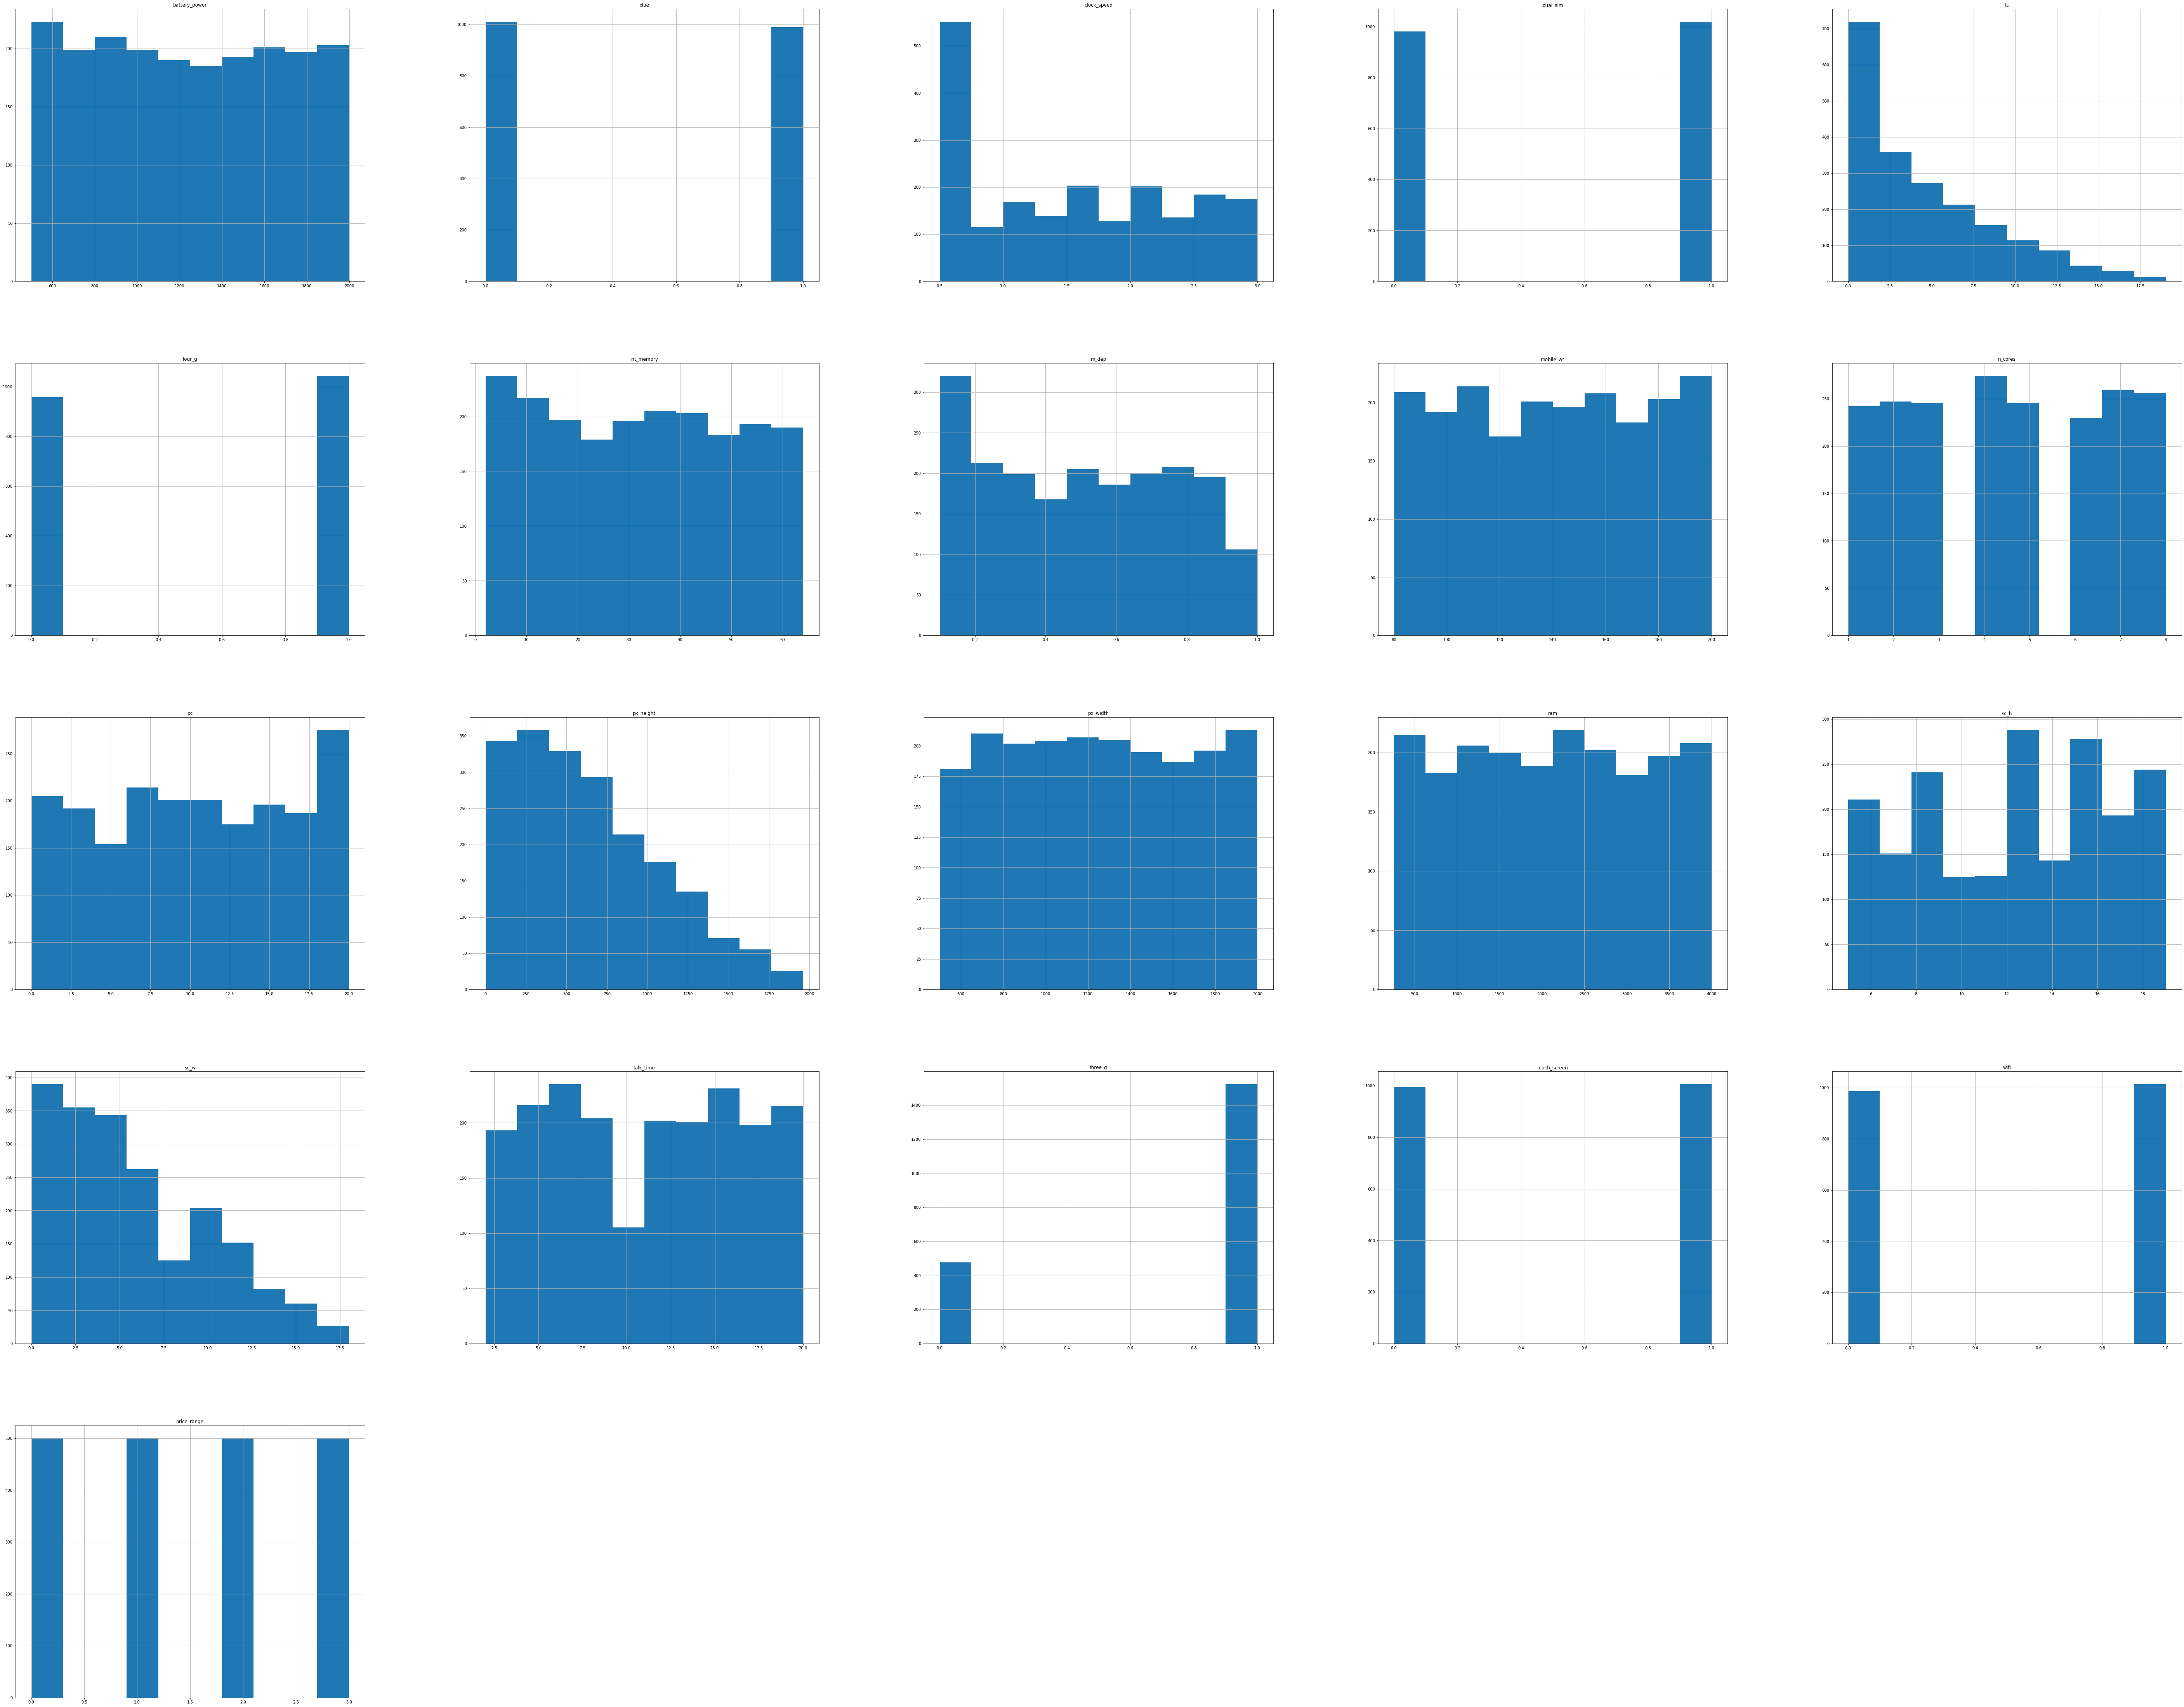

In [16]:
a=df1.hist(figsize=(100,80))

### Bivariate Data Analysis

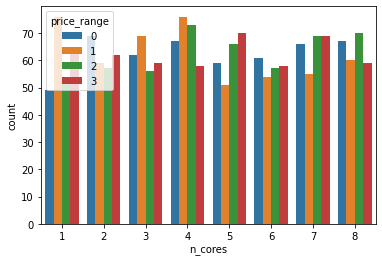

In [17]:
sns.countplot(x = df1['n_cores'], hue=df1['price_range'])
plt.show()

### Understanding Target Variable

In [18]:
df1['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

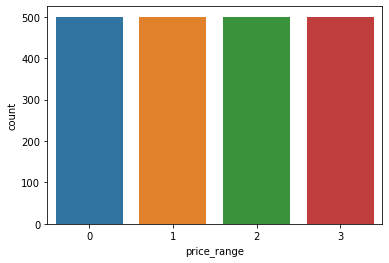

In [19]:
sns.countplot(x=df1['price_range'])
plt.show()

### Analysing Further

In [20]:
df1.groupby(['price_range']).agg({'ram':['min','max','sum','mean','count','median'],
                                'clock_speed':['min','max','sum','mean','count','median']})

ram                                        clock_speed       \
              min   max      sum      mean count  median         min  max   
price_range                                                                 
0             256  1974   392657   785.314   500   719.5         0.5  3.0   
1             387  2811   839745  1679.490   500  1686.5         0.5  3.0   
2            1185  3916  1291408  2582.816   500  2577.0         0.5  3.0   
3            2259  3998  1724616  3449.232   500  3509.5         0.5  3.0   

                                         
               sum    mean count median  
price_range                              
0            775.1  1.5502   500   1.55  
1            744.3  1.4886   500   1.50  
2            764.9  1.5298   500   1.50  
3            760.2  1.5204   500   1.50

In [21]:
d1 = df1.groupby(['price_range']).agg({'ram':['min','max','mean','median'],
                                'clock_speed':['min','max','mean','median']})
d1

ram                         clock_speed                    
              min   max      mean  median         min  max    mean median
price_range                                                              
0             256  1974   785.314   719.5         0.5  3.0  1.5502   1.55
1             387  2811  1679.490  1686.5         0.5  3.0  1.4886   1.50
2            1185  3916  2582.816  2577.0         0.5  3.0  1.5298   1.50
3            2259  3998  3449.232  3509.5         0.5  3.0  1.5204   1.50

In [22]:
d2 = df1.groupby(['price_range']).agg({'battery_power':['min','max','mean','median'],
                                'int_memory':['min','max','mean','median']})
d2

battery_power                         int_memory              \
                      min   max      mean  median        min max    mean   
price_range                                                                
0                     503  1994  1116.902  1066.0          2  64  31.174   
1                     501  1996  1228.868  1206.0          2  64  32.116   
2                     501  1998  1228.320  1219.5          2  64  30.920   
3                     503  1994  1379.984  1449.5          2  64  33.976   

                    
            median  
price_range         
0             30.0  
1             32.0  
2             30.0  
3             34.5

In [23]:
d3 = df1.groupby(['price_range']).agg({'pc':['min','max','mean','median'],
                                'fc':['min','max','mean','median']})
d3

pc                     fc                  
            min max    mean median min max   mean median
price_range                                             
0             0  20   9.574    9.5   0  19  4.084    3.0
1             0  20   9.924   10.0   0  18  4.340    3.0
2             0  20  10.018   10.0   0  18  4.498    3.0
3             0  20  10.150   10.0   0  18  4.316    3.0

In [24]:
d4 = df1.groupby(['price_range']).agg({'n_cores':['min','max','mean','median'],
                                'mobile_wt':['min','max','mean','median']})
d4

n_cores                   mobile_wt                     
                min max   mean median       min  max     mean median
price_range                                                         
0                 1   8  4.600    5.0        80  200  140.552  142.0
1                 1   8  4.298    4.0        80  200  140.510  141.0
2                 1   8  4.682    5.0        80  200  143.614  145.0
3                 1   8  4.502    5.0        80  200  136.320  134.0

In [25]:
d5 = df1.groupby(['price_range']).agg({'px_height':['min','max','mean','median'],
                                'px_width':['min','max','mean','median']})
d5

px_height                       px_width                        
                  min   max     mean median      min   max      mean  median
price_range                                                                 
0                   1  1878  536.408  465.5      500  1989  1150.270  1132.5
1                   0  1914  666.892  606.0      500  1998  1251.908  1223.0
2                  10  1960  632.284  538.5      508  1997  1234.046  1221.5
3                   0  1949  744.848  674.0      501  1995  1369.838  1415.5

In [26]:
d6 = df1.groupby(['price_range']).agg({'sc_h':['min','max','mean','median'],
                                'sc_w':['min','max','mean','median']})
d6

sc_h                    sc_w                  
             min max    mean median  min max   mean median
price_range                                               
0              5  19  12.324   12.0    0  18  5.682    5.0
1              5  19  12.212   12.0    0  18  5.544    5.0
2              5  19  12.010   12.0    0  17  5.714    5.0
3              5  19  12.680   13.0    0  18  6.128    5.0

### Correlation

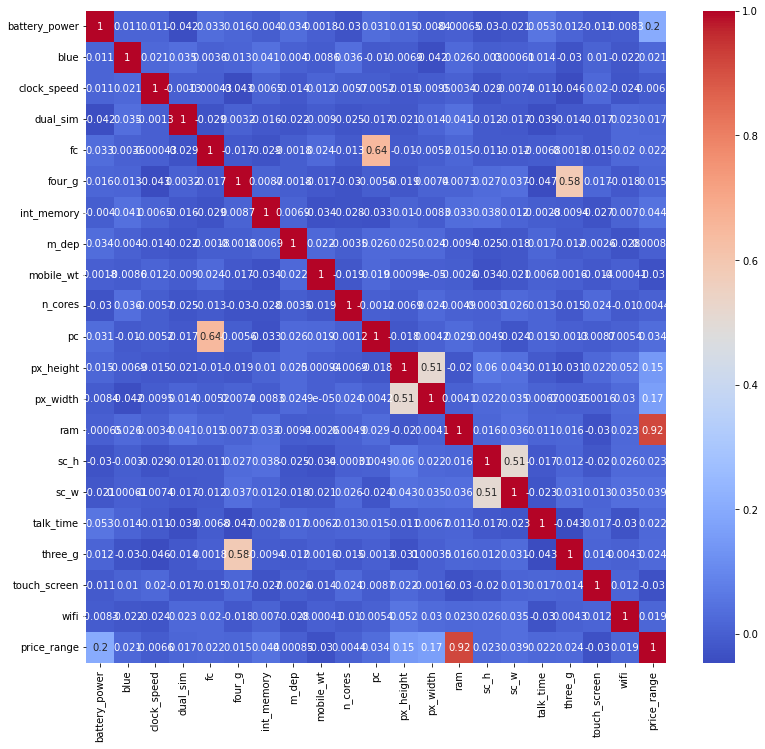

In [27]:
corr = df1.corr()
plt.figure(figsize=(13,12))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

- No high correlation

### Outlier Treatment

In [28]:
df1.describe(percentiles=[0.02,0.03,0.05,0.97,0.98,0.99]).T

,count,mean,std,min,2%,3%,5%,50%,97%,98%,99%,max
battery_power,2000.0,1238.51850,439.418206,501.0,524.96,538.97,570.95,1226.0,1961.06,1974.00,1987.00,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.00,0.00,0.0,1.00,1.00,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.50,0.50,0.50,1.5,2.90,2.90,3.00,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,0.00,0.00,1.0,1.00,1.00,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,0.00,0.00,0.00,3.0,15.00,16.00,16.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,0.00,0.00,1.0,1.00,1.00,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,2.00,3.00,5.00,32.0,63.00,63.00,64.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.10,0.10,0.10,0.5,1.00,1.00,1.00,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,82.00,83.00,86.00,141.0,198.00,199.00,199.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,1.00,1.00,1.00,4.0,8.00,8.00,8.00,8.0


In [29]:
cols_with_outliers = ['battery_power','px_height','px_width','ram']

In [30]:
def outlier_treatment(x):
    x = x.clip(upper = x.quantile(0.97))
    x = x.clip(lower = x.quantile(0.03))
    return x

In [31]:
df1[cols_with_outliers] = df1[cols_with_outliers].apply(outlier_treatment)

In [32]:
df1.describe(percentiles=[0.03,0.97]).T

,count,mean,std,min,3%,50%,97%,max
battery_power,2000.0,1238.57640,437.369233,538.97,538.9991,1226.0,1961.0018,1961.06
blue,2000.0,0.49500,0.500100,0.00,0.0000,0.0,1.0000,1.00
clock_speed,2000.0,1.52225,0.816004,0.50,0.5000,1.5,2.9000,3.00
dual_sim,2000.0,0.50950,0.500035,0.00,0.0000,1.0,1.0000,1.00
fc,2000.0,4.30950,4.341444,0.00,0.0000,3.0,15.0000,19.00
four_g,2000.0,0.52150,0.499662,0.00,0.0000,1.0,1.0000,1.00
int_memory,2000.0,32.04650,18.145715,2.00,3.0000,32.0,63.0000,64.00
m_dep,2000.0,0.50175,0.288416,0.10,0.1000,0.5,1.0000,1.00
mobile_wt,2000.0,140.24900,35.399655,80.00,83.0000,141.0,198.0000,200.00
n_cores,2000.0,4.52050,2.287837,1.00,1.0000,4.0,8.0000,8.00


### We will now train models:

In [33]:
x = df1.drop('price_range',axis=1)
y = df1['price_range']

In [34]:
print(x.shape)
print(y.shape)

(2000, 20)
(2000,)


In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,
                                                 random_state=50)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1500, 20)
(500, 20)
(1500,)
(500,)


### Building models:

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [38]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import precision_score,recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, classification_report, accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [45]:
def gen_metrics(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    print('Training score',train_score)
    print('Testing score',test_score)
    print('Accuracy_Score',acc)
    cm = confusion_matrix(y_test,y_pred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(y_test,y_pred))

### Feature Selection

In [46]:
m1 = RandomForestClassifier(n_estimators=110,criterion='entropy',
                           max_depth=12,min_samples_split=15)
gen_metrics(m1,x_train,x_test,y_train,y_test)

Training score 0.9906666666666667
Testing score 0.896
Accuracy_Score 0.896
Confusion Matrix
 [[114   5   0   0]
 [  4 113  11   0]
 [  0  14 107   3]
 [  0   0  15 114]]
Classification Report
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       119
           1       0.86      0.88      0.87       128
           2       0.80      0.86      0.83       124
           3       0.97      0.88      0.93       129

    accuracy                           0.90       500
   macro avg       0.90      0.90      0.90       500
weighted avg       0.90      0.90      0.90       500



In [47]:
fimp_m1 = pd.DataFrame({'Features':x_train.columns,
                        'Norm_Imp':m1.feature_importances_})
fimp_m1.sort_values(by='Norm_Imp',ascending=False)

,Features,Norm_Imp
13,ram,0.626340
0,battery_power,0.073803
11,px_height,0.050183
12,px_width,0.049467
8,mobile_wt,0.027432
6,int_memory,0.023509
15,sc_w,0.018534
14,sc_h,0.018411
16,talk_time,0.018242
10,pc,0.016675


In [48]:
sig_feat = fimp_m1[fimp_m1['Norm_Imp']>=0.019]
sig_feat.sort_values(by='Norm_Imp',ascending=False)

,Features,Norm_Imp
13,ram,0.626340
0,battery_power,0.073803
11,px_height,0.050183
12,px_width,0.049467
8,mobile_wt,0.027432
6,int_memory,0.023509


### Training model after feature selection

In [49]:
x_sig = df1[sig_feat['Features'].values]
print(x_sig.shape)
print(y.shape)

(2000, 6)
(2000,)


In [50]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x_sig,y,test_size=0.25,
                                                     random_state=15)
print(x_train1.shape)
print(x_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(1500, 6)
(500, 6)
(1500,)
(500,)


In [55]:
rf = RandomForestClassifier(max_depth = 7, max_leaf_nodes = 35, random_state = 10)
gen_metrics(rf,x_train1,x_test1,y_train1,y_test1)
y_pred_rf = rf.predict(x_test1)

Training score 0.9546666666666667
Testing score 0.89
Accuracy_Score 0.89
Confusion Matrix
 [[109   2   0   0]
 [ 14 118   7   0]
 [  0  11  99   9]
 [  0   0  12 119]]
Classification Report
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       111
           1       0.90      0.85      0.87       139
           2       0.84      0.83      0.84       119
           3       0.93      0.91      0.92       131

    accuracy                           0.89       500
   macro avg       0.89      0.89      0.89       500
weighted avg       0.89      0.89      0.89       500



### AdaBoost

In [64]:
ada = AdaBoostClassifier()
gen_metrics(ada,x_train1,x_test1,y_train1,y_test1)
y_pred_ada = ada.predict(x_test1)

Training score 0.646
Testing score 0.67
Accuracy_Score 0.67
Confusion Matrix
 [[ 54  57   0   0]
 [  3 124  11   1]
 [  0  10  93  16]
 [  0   0  67  64]]
Classification Report
               precision    recall  f1-score   support

           0       0.95      0.49      0.64       111
           1       0.65      0.89      0.75       139
           2       0.54      0.78      0.64       119
           3       0.79      0.49      0.60       131

    accuracy                           0.67       500
   macro avg       0.73      0.66      0.66       500
weighted avg       0.73      0.67      0.66       500



### XGBoost

In [68]:
xgb = XGBClassifier()
gen_metrics(xgb,x_train1,x_test1,y_train1,y_test1)
y_pred_xgb = xgb.predict(x_test1)

Training score 1.0
Testing score 0.924
Accuracy_Score 0.924
Confusion Matrix
 [[107   4   0   0]
 [  7 129   3   0]
 [  0   5 106   8]
 [  0   0  11 120]]
Classification Report
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       111
           1       0.93      0.93      0.93       139
           2       0.88      0.89      0.89       119
           3       0.94      0.92      0.93       131

    accuracy                           0.92       500
   macro avg       0.92      0.92      0.92       500
weighted avg       0.92      0.92      0.92       500



### SVM

In [70]:
from sklearn.svm import SVC

In [71]:
svm = SVC()
gen_metrics(svm,x_train1,x_test1,y_train1,y_test1)
y_pred_svm = svm.predict(x_test1)

Training score 0.9546666666666667
Testing score 0.952
Accuracy_Score 0.952
Confusion Matrix
 [[110   1   0   0]
 [  5 134   0   0]
 [  0   8 104   7]
 [  0   0   3 128]]
Classification Report
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       111
           1       0.94      0.96      0.95       139
           2       0.97      0.87      0.92       119
           3       0.95      0.98      0.96       131

    accuracy                           0.95       500
   macro avg       0.95      0.95      0.95       500
weighted avg       0.95      0.95      0.95       500



### Naive Bayes
#### Gaussian NB

In [72]:
gb = GaussianNB(priors=[0.25,0.25,0.25,0.25])
gen_metrics(gb,x_train1,x_test1,y_train1,y_test1)
y_pred_gb = gb.predict(x_test1)

Training score 0.796
Testing score 0.816
Accuracy_Score 0.816
Confusion Matrix
 [[107   4   0   0]
 [ 12  99  28   0]
 [  0  20  89  10]
 [  0   0  18 113]]
Classification Report
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       111
           1       0.80      0.71      0.76       139
           2       0.66      0.75      0.70       119
           3       0.92      0.86      0.89       131

    accuracy                           0.82       500
   macro avg       0.82      0.82      0.82       500
weighted avg       0.82      0.82      0.82       500



#### MultinomialNB

In [73]:
mn = MultinomialNB()
gen_metrics(mn,x_train1,x_test1,y_train1,y_test1)
y_pred_mn = mn.predict(x_test1)

Training score 0.5206666666666667
Testing score 0.518
Accuracy_Score 0.518
Confusion Matrix
 [[87 20  3  1]
 [36 49 33 21]
 [ 5 25 39 50]
 [ 0 15 32 84]]
Classification Report
               precision    recall  f1-score   support

           0       0.68      0.78      0.73       111
           1       0.45      0.35      0.40       139
           2       0.36      0.33      0.35       119
           3       0.54      0.64      0.59       131

    accuracy                           0.52       500
   macro avg       0.51      0.53      0.51       500
weighted avg       0.50      0.52      0.51       500



### Conclusion
- Models with high accuracy score are SVM, XGBoost and Gaussian Naive Bayes.